# Ryan Shearer          24695394

## Part 1

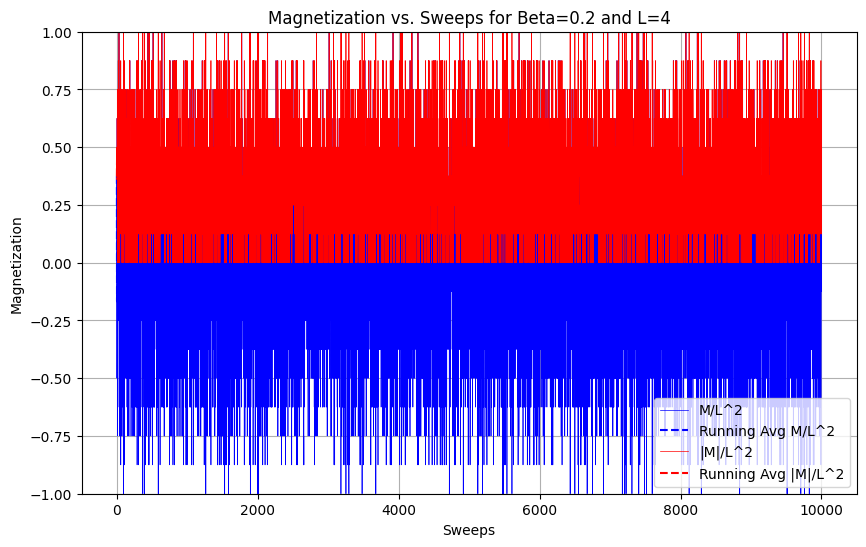

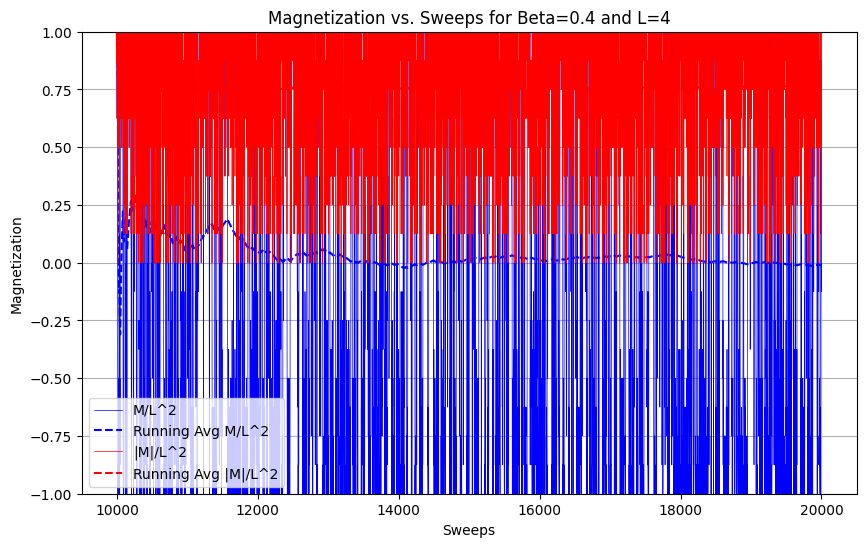

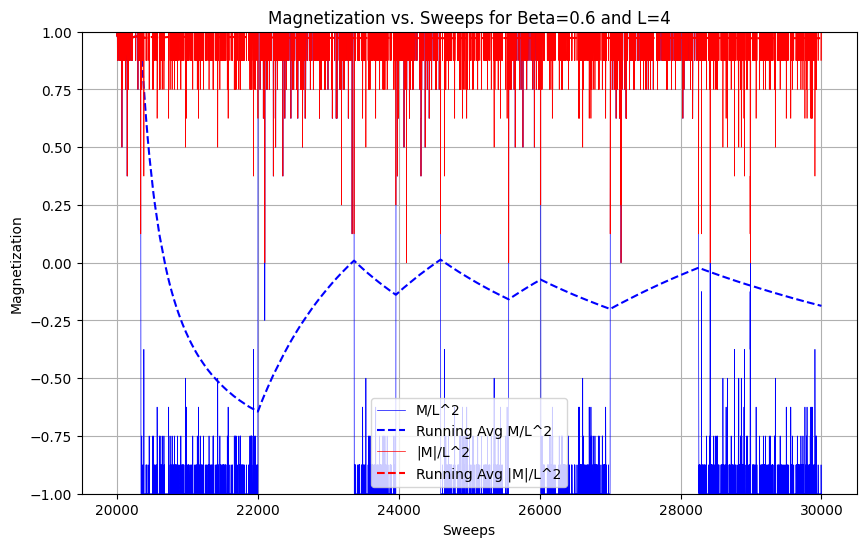

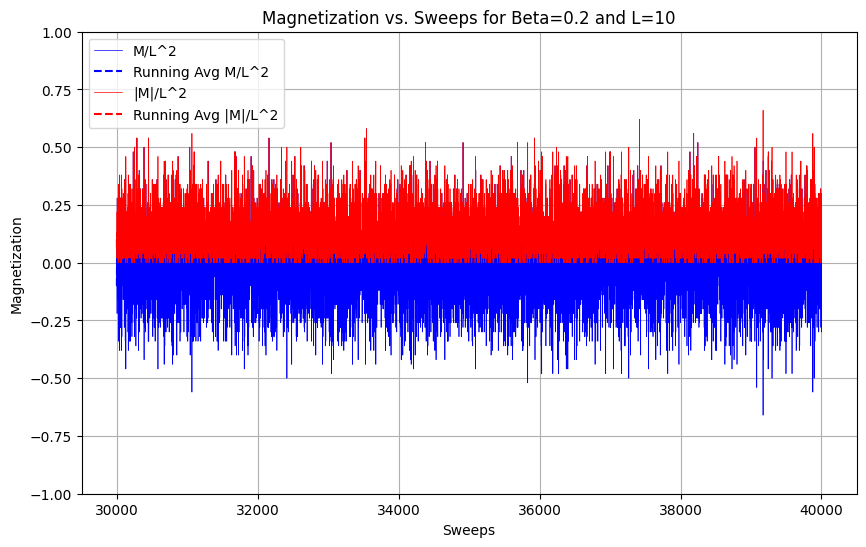

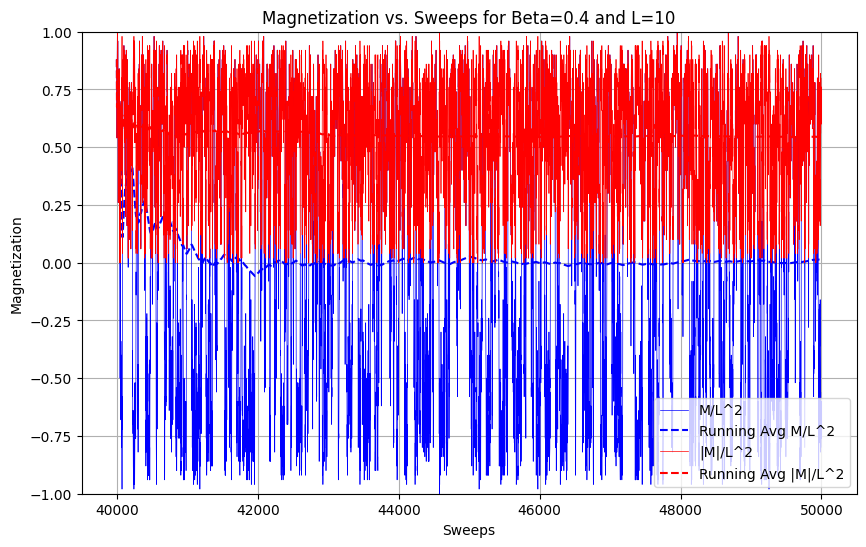

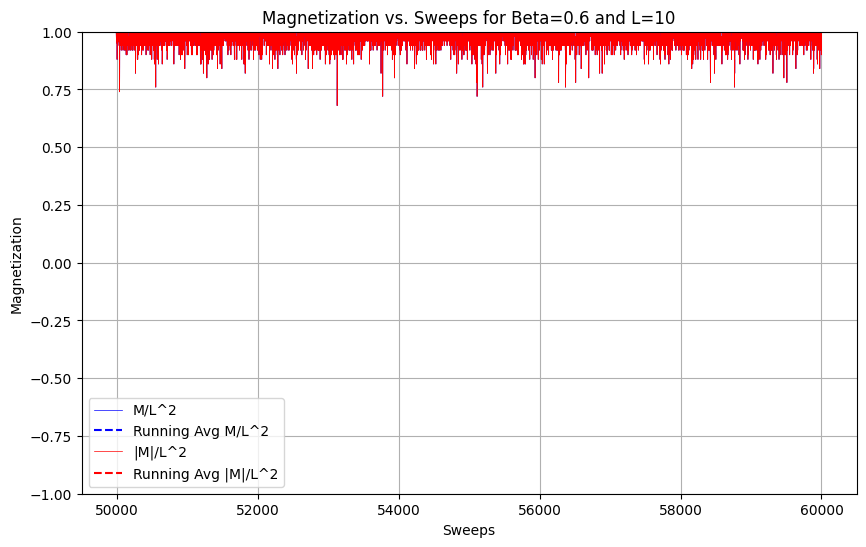

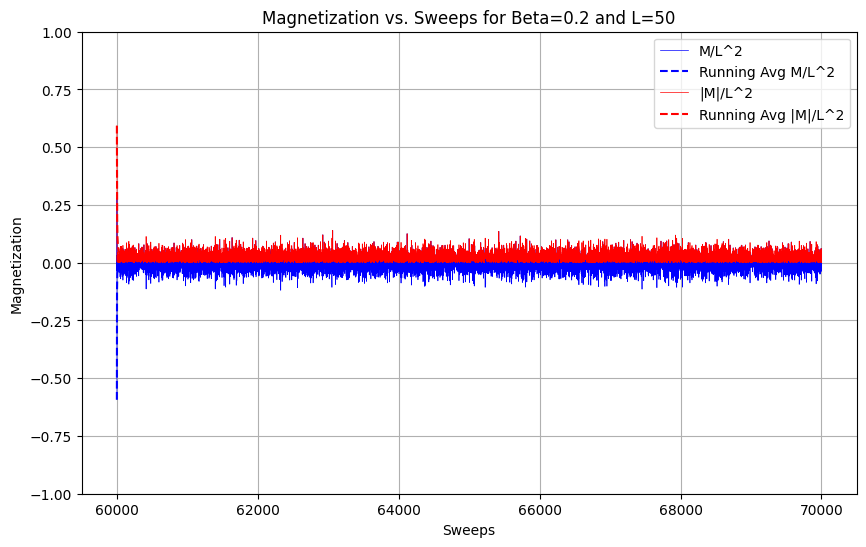

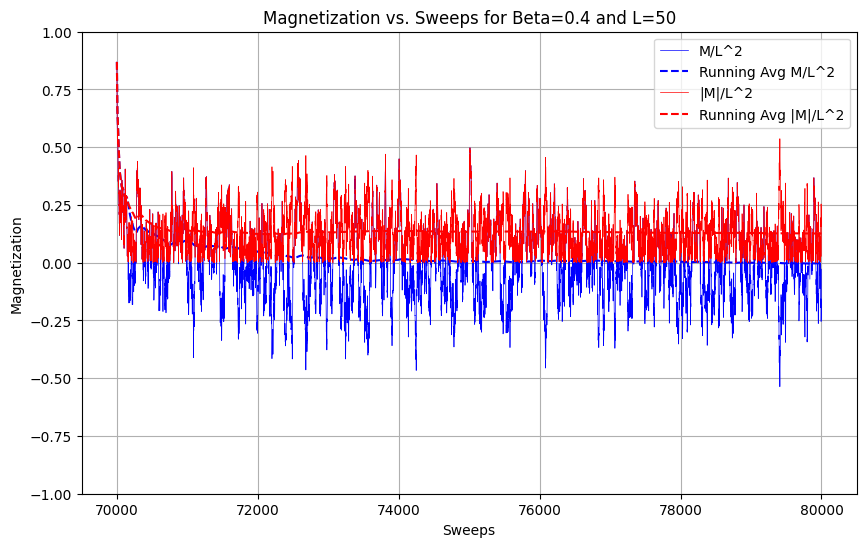

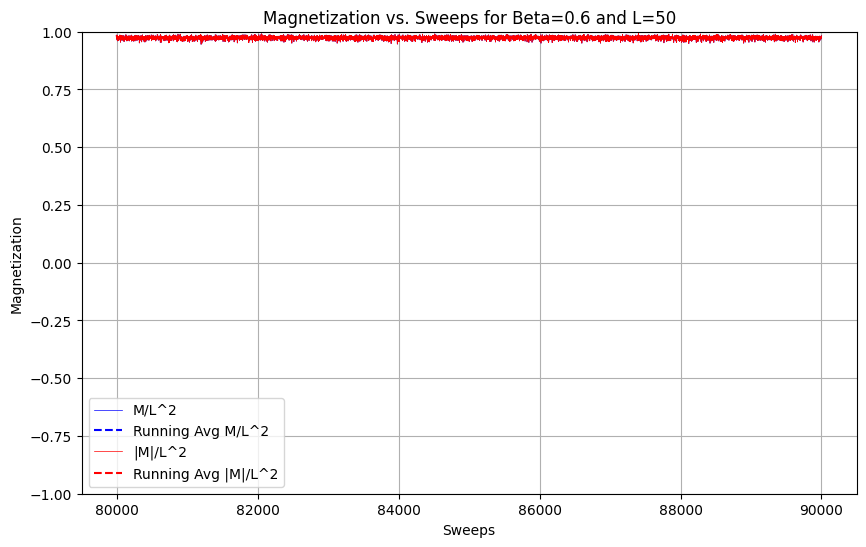

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV
data = pd.read_csv("data.csv")

# Function to plot M/L^2 and |M|/L^2 vs. sweeps for a given beta and L
def plot_magnetization_vs_sweeps(beta, L):
    #subset = data[data['Beta'] == beta].copy()
    subset = data[(data['Beta'] == beta) & (data['L'] == L)].copy()


    # Calculate running averages
    subset['M_avg'] = np.cumsum(subset['M']) / np.arange(1, len(subset) + 1)
    subset['M_abs_avg'] = np.cumsum(subset['|M|']) / np.arange(1, len(subset) + 1)

    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(subset['M'] / (L*L), label='M/L^2', color='blue',linewidth=0.5)
    plt.plot(subset['M_avg'] / (L*L), label='Running Avg M/L^2', linestyle='--', color='blue')
    
    plt.plot(subset['|M|'] / (L*L), label='|M|/L^2', color='red',linewidth=0.5)
    plt.plot(subset['M_abs_avg'] / (L*L), label='Running Avg |M|/L^2', linestyle='--', color='red')
    
    plt.xlabel('Sweeps')
    plt.ylabel('Magnetization')
    plt.ylim(-1,1)
    plt.title(f'Magnetization vs. Sweeps for Beta={beta} and L={L}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for different values of L and Beta
L_values = [4, 10, 50]
Beta_values = [0.2,0.4,0.6]

for L in L_values:
    for beta in Beta_values:
        plot_magnetization_vs_sweeps(beta, L)




## Part 2

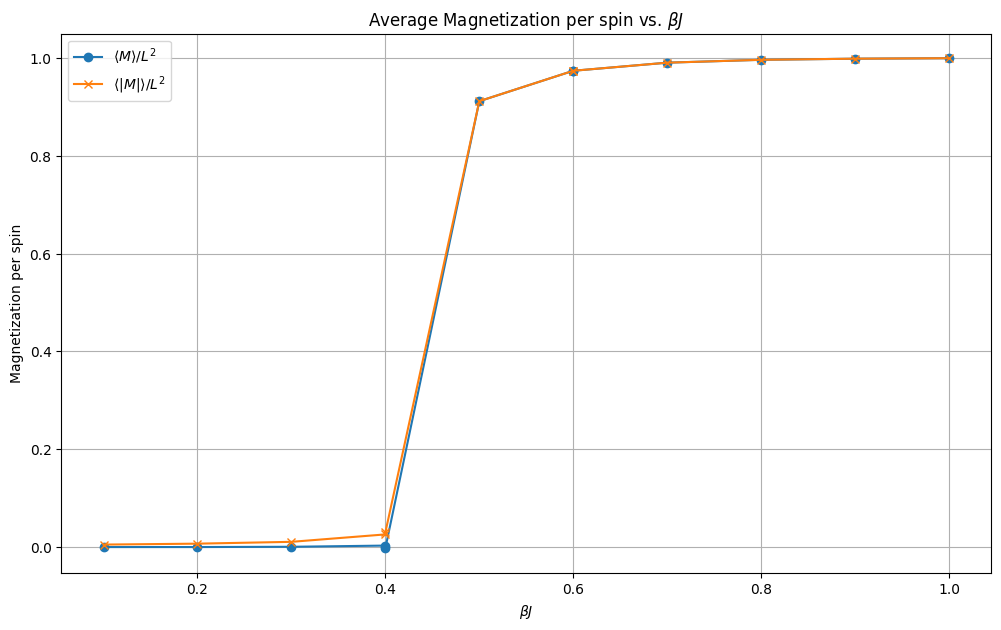

In [12]:
L = 200

averages_data = pd.read_csv("averages_part2.csv")

averages_data.columns = ['L', 'Beta', '<E>', '<E2>', '<M>','<|M|>', '<M2>']

# Filtering data for L = 200 as specified in Part 2 of the assignment
subset = averages_data[averages_data['L'] == 200].copy()


# Computing average magnetization per spin and average absolute magnetization per spin
subset['m'] = subset['<M>'] / (L ** 2)
subset['m_abs'] = (subset['<|M|>']) / (L ** 2)

# Plotting
plt.figure(figsize=(12, 7))
plt.plot(subset['Beta'], subset['m'], label=r'$\langle M \rangle / L^2$', marker='o')
plt.plot(subset['Beta'], subset['m_abs'], label=r'$\langle |M| \rangle / L^2$', marker='x')
plt.xlabel(r'$\beta J$')
plt.ylabel('Magnetization per spin')
plt.title('Average Magnetization per spin vs. ' + r'$\beta J$')
plt.legend()
plt.grid(True)
plt.show()

## Part 3

In [19]:
#TODO: divide jx and c/k by N?

# Load the data for Part 3 and inspect its structure
data_part3 = pd.read_csv("averages_part3.csv")
data_part3.head()


# Calculate c/k and Jχ for each row in the dataset

# c/k calculation
data_part3['c/k'] = data_part3['Beta']**2 * (data_part3['<E2>'] - data_part3['<E>']**2) /N

# Jχ calculation
# We'll need to handle NaN values in M2_avg. For simplicity, we'll fill NaN with 0. 
# A more rigorous approach might involve interpolation or other imputation methods.
#data_part3['<M2>'].fillna(0, inplace=True)
data_part3['Jχ'] = data_part3['Beta'] * (data_part3['<M2>'] - data_part3['<M>']**2) /N

# Inspect the resulting dataframe
data_part3.head()


# Calculate t for each row in the dataset
# Given J = 1.0 and using the provided formula for t
Tc = 2 / (np.log(1 + np.sqrt(2)))  # Curie temperature for the 2D Ising model
data_part3['t'] = (1 / (data_part3['Beta'] * Tc)) - 1

# Inspect the resulting dataframe
data_part3.head()


# Plot c/k and Jχ as functions of t

plt.figure(figsize=(14, 6))

# Plot for c/k
plt.subplot(1, 2, 1)
plt.plot(data_part3['t'], data_part3['c/k'], 'o-', markersize=4)
plt.title('$c/k$ vs. $t$')
plt.xlabel('$t$')
plt.ylabel('$c/k$')

# Plot for Jχ
plt.subplot(1, 2, 2)
plt.plot(data_part3['t'], data_part3['Jχ'], 'o-', markersize=4, color='red')
plt.title('$Jχ$ vs. $t$')
plt.xlabel('$t$')
plt.ylabel('$Jχ$')

plt.tight_layout()
plt.show()


# Plot Jχ against |t| on a log-log scale
plt.figure(figsize=(8, 6))
plt.loglog(np.abs(data_part3['t']), np.abs(data_part3['Jχ']), 'o-', markersize=4, color='blue')
plt.title('Log-Log plot of $Jχ$ vs. $|t|$')
plt.xlabel('Log $|t|$')
plt.ylabel('Log $Jχ$')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


KeyError: '<M2>'

## Part 4